### 2440094680 - Belinda Gan

In [1]:
!pip install jupyterthemes

In [2]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [3]:
!jt -monokai

In [4]:
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme

In [5]:
# set_nb_theme('monokai')

In [6]:
print("\n")

### Data Dictionary

In [7]:
# Survived: 0 = No, 1 = Yes 
# pclass: Ticket Class
# 1: 1st Ticket
# Class 2: 2nd Ticket
# Class 3: 3rd 

# sex: Sex

# age: Age in years

# sibsp: # of siblings / spouses aboard the Titanic

# parch: # of parents / children aboard the Titanic

# ticket: ticket number

# fare: Passenger fare

# cabin: cabin number 

# embarked: Pocket of Embarkation
# C: Cherbourg Pocket of Embakartion
# Q: Queenstown Pocket of Embarkation 
# S: Southampton

In [8]:
# Variable Notes
# pclass: A proxy for socio-economic status (SES)
# 1st = Upper
# 2nd = Middle
# 3rd = Lower

# age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

# sibsp: The dataset defines family relations in this way...
# Sibling = brother, sister, stepbrother, stepsister
# Spouse = husband, wife (mistresses and fiancés were ignored)

# parch: The dataset defines family relations in this way...
# Parent = mother, father
# Child = daughter, son, stepdaughter, stepson
# Some children travelled only with a nanny, therefore parch=0 for them.

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
print("\n")

# Dataset Titanic

In [11]:
gender_train = pd.read_csv('train.csv')
gender_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
gender_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
gender_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# quick way to separate numeric columns
gender_train.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [15]:
gender_test = pd.read_csv('test.csv')
gender_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
gender_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [17]:
gender_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [18]:
gender_test.describe().columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [19]:
print("\n")

Check whether both the training and test datasets have missing values (NANs) or not.

In [20]:
gender_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
gender_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [22]:
# Training Data
# x_train = gender_train.iloc[:, 1:6]
# x_train

In [23]:
# Test Data
# x_test = gender_test.iloc[:, 1:10]
# x_test

In [24]:
print("\n")

In [25]:
# Training Data
# y_train = gender_train.iloc[:, 0]
# y_train

In [26]:
# y_test = gender_test.iloc[:, 0]
# y_test

In [27]:
print("\n\n")

# Feature Engineering

#### Combine Train and Test Dataset

In [28]:
train_test_combine = [gender_train, gender_test]

In [29]:
print("\n")

### Name

In [30]:
# get the title from names of both test and training dataset combined
for titanic_data in train_test_combine:
    titanic_data["Title"] = titanic_data["Name"].str.extract(" ([A-Za-z]+)\.", expand = False)

In [31]:
gender_train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Lady          1
Don           1
Countess      1
Ms            1
Mme           1
Capt          1
Jonkheer      1
Sir           1
Name: Title, dtype: int64

In [32]:
gender_test["Title"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [33]:
# Map the Title (which is got from names of both training and test dataset combined)

for titanic_data in train_test_combine:
    titanic_data['Title'] = titanic_data['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Col": 5, "Rev": 5, "Dr": 5, "Ms": 5, "Dona": 5, "Mlle": 5, "Major": 5, "Jonkheer": 5, "Capt": 5, "Sir": 5,  "Don": 5, "Countess": 5, "Lady": 5, "Mme": 5})

In [34]:
gender_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [35]:
gender_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3


In [36]:
# names are uneccessary in our data analysis, therefore we have to delete this
gender_train.drop("Name", axis = 1, inplace = True) # axis 1 means column, axis 0 means row
gender_test.drop("Name", axis = 1, inplace = True)

In [37]:
gender_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,1


In [38]:
gender_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,3
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,3


In [39]:
print("\n")

### Sex

In [40]:
# Male: 0, Female: 1
for titanic_data in train_test_combine:
    titanic_data["Sex"] = titanic_data["Sex"].map({"male": 0, "female": 1}).astype(int)

In [41]:
gender_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,1


In [42]:
gender_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,3
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,3


In [43]:
print("\n")

### Age

In [44]:
# fill missing value in age column
# gender_train["Age"].fillna(value = 0, inplace = True)
# gender_test["Age"].fillna(value = 0, inplace = True)

In [45]:
# since age is related to the passenger's title, fill missing values in age column with age median for each title (Mr, Miss, Mrs, Master, Col, Rev, Dr, Ms, Dona)
gender_train["Age"].fillna(gender_train.groupby("Title")["Age"].transform("median"), inplace = True)
gender_test["Age"].fillna(gender_test.groupby("Title")["Age"].transform("median"), inplace = True)

In [46]:
gender_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,1


In [47]:
gender_train.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886    44.5
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

In [48]:
gender_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,3
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,3


In [49]:
print("\n")

#### Convert Age in Numerical Data to Categorical Data

Age Feature Engineering Notes: 
Child: 0 (1 - 11 years old) 
Teenager: 1 (12 - 21 years old) 
Young Adult: 2 (22 - 35 years old) 
Middle-Aged Adult: 3 (36 to 60 years) 
Senior: 4 (> 60 years)

In [50]:
# for titanic_data in train_test_combine:
    # titanic_data.loc[titanic_data["Age"] <= 11, "Age"] = 1 # Child
    # titanic_data.loc[titanic_data["Age"] >= 12 & titanic_data["Age"] <= 21, "Age"] = 2 # Teenager
    # titanic_data.loc[titanic_data["Age"] >= 22 & titanic_data["Age"] <= 35, "Age"] = 3 # Young Adult
    # titanic_data.loc[titanic_data["Age"] >= 36 & titanic_data["Age"] <= 60, "Age"] = 4 # Middle-Aged Adult
    # titanic_data.loc[titanic_data["Age"] >= 61, "Age"] = 5 # Senior

In [51]:
# for titanic_data in train_test_combine:
    # titanic_data.loc[titanic_data["Age"] <= 11, "Age"] = 1 # Child
    # titanic_data.loc[(titanic_data["Age"] >= 12) & (titanic_data["Age"] <= 21, "Age")] = 2 # Teenager
    # titanic_data.loc[(titanic_data["Age"] >= 22) & (titanic_data["Age"] <= 35, "Age")] = 3 # Young Adult
    # titanic_data.loc[(titanic_data["Age"] >= 36) & (titanic_data["Age"] <= 60, "Age")] = 4 # Middle-Aged Adult
    # titanic_data.loc[titanic_data["Age"] >= 61, "Age"] = 5 # Senior

In [52]:
for titanic_data in train_test_combine:
    titanic_data.loc[(titanic_data["Age"] > 0) & (titanic_data["Age"] <= 11), "Age"] = 1 # Child
    titanic_data.loc[(titanic_data["Age"] >= 12) & (titanic_data["Age"] <= 21), "Age"] = 2 # Teenager
    titanic_data.loc[(titanic_data["Age"] >= 22) & (titanic_data["Age"] <= 35), "Age"] = 3 # Young Adult
    titanic_data.loc[(titanic_data["Age"] >= 36) & (titanic_data["Age"] <= 60), "Age"] = 4 # Middle-Aged Adult
    titanic_data.loc[titanic_data["Age"] >= 61, "Age"] = 5 # Senior

In [53]:
gender_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,3.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,1,4.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,1,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,1,3.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,0,3.0,0,0,373450,8.0500,NaN,S,1


In [54]:
gender_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,3.0,0,0,330911,7.8292,NaN,Q,1
1,893,3,1,4.0,1,0,363272,7.0000,NaN,S,3
2,894,2,0,5.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,0,3.0,0,0,315154,8.6625,NaN,S,1
4,896,3,1,3.0,1,1,3101298,12.2875,NaN,S,3


In [55]:
print("\n")

In [56]:
# names are uneccessary in our data analysis, therefore we have to delete this
# gender_train.drop('Name', axis = 1, inplace = True)
# gender_test.drop('Name', axis = 1, inplace = True)

In [57]:
# gender_train.head()

In [58]:
# gender_test.head()

### Embarked

Filling missing values (NANs) in Ticket column

In [59]:
# pclass: 
# Ticket Class 1: 1st 
# Ticket Class 2: 2nd 
# Ticket Class 3: 3rd

In [60]:
gender_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [61]:
# I fill missing values in Embarked column with "S" because 
for titanic_data in train_test_combine:
    titanic_data["Embarked"] = titanic_data["Embarked"].fillna("S")

In [62]:
gender_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,3.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,1,4.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,1,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,1,3.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,0,3.0,0,0,373450,8.0500,NaN,S,1


In [63]:
gender_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,3.0,0,0,330911,7.8292,NaN,Q,1
1,893,3,1,4.0,1,0,363272,7.0000,NaN,S,3
2,894,2,0,5.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,0,3.0,0,0,315154,8.6625,NaN,S,1
4,896,3,1,3.0,1,1,3101298,12.2875,NaN,S,3


In [64]:
# embarked: 
# Pocket of Embarkation C: Cherbourg 
# Pocket of Embakartion Q: Queenstown 
# Pocket of Embarkation S: Southampton

In [65]:
# change Embarked from numeric data to categorical data
for titanic_data in train_test_combine:
    titanic_data['Embarked'] = titanic_data['Embarked'].map({"S": 1, "C": 2, "Q": 3}).astype(int)

In [66]:
print("\n")

### Fare

In [67]:
# fill missing values in Fare with median of Fare for each Pclass (since Fare (the money a passenger on public transportation has to pay) correlates strongly with Pclass)
gender_train["Fare"].fillna(gender_train.groupby("Pclass")["Fare"].transform("median"), inplace = True)
gender_test["Fare"].fillna(gender_test.groupby("Pclass")["Fare"].transform("median"), inplace = True)

In [68]:
# categorize Fare data into four ranges
gender_train["Fare Category"] = pd.qcut(gender_train["Fare"], 4)
gender_train[["Fare Category", "Survived"]].groupby(["Fare Category"], as_index = False).mean()

,Fare Category,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [69]:
for titanic_data in train_test_combine:
    titanic_data.loc[(titanic_data["Fare"] >= -0.001) & (titanic_data["Fare"] <= 7.91), "Fare"] = 1
    titanic_data.loc[(titanic_data["Fare"] > 7.91) & (titanic_data["Fare"] <= 14.454), "Fare"] = 2
    titanic_data.loc[(titanic_data["Fare"] > 14.454) & (titanic_data["Fare"] <= 31.0), "Fare"] = 3
    titanic_data.loc[(titanic_data["Fare"] > 31.0) & (titanic_data["Fare"] <= 512.329), "Fare"] = 4

In [70]:
gender_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare Category
0,1,0,3,0,3.0,1,0,A/5 21171,1.0,NaN,1,1,"(-0.001, 7.91]"
1,2,1,1,1,4.0,1,0,PC 17599,4.0,C85,2,3,"(31.0, 512.329]"
2,3,1,3,1,3.0,0,0,STON/O2. 3101282,2.0,NaN,1,2,"(7.91, 14.454]"
3,4,1,1,1,3.0,1,0,113803,4.0,C123,1,3,"(31.0, 512.329]"
4,5,0,3,0,3.0,0,0,373450,2.0,NaN,1,1,"(7.91, 14.454]"


In [71]:
gender_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,3.0,0,0,330911,1.0,NaN,3,1
1,893,3,1,4.0,1,0,363272,1.0,NaN,1,3
2,894,2,0,5.0,0,0,240276,2.0,NaN,3,1
3,895,3,0,3.0,0,0,315154,2.0,NaN,1,1
4,896,3,1,3.0,1,1,3101298,2.0,NaN,1,3


In [72]:
print("\n")

### Cabin

In [73]:
gender_train["Cabin"].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
E101           3
D              3
              ..
B102           1
A7             1
E38            1
C128           1
C87            1
Name: Cabin, Length: 147, dtype: int64

In [74]:
# since we only want to take sum of each of the cabin types, therefore we use:
for titanic_data in train_test_combine:
    titanic_data["Cabin"] = titanic_data["Cabin"].str[:1]

In [75]:
# DEBUG
# gender_train.head(15)

<AxesSubplot:ylabel='Frequency'>

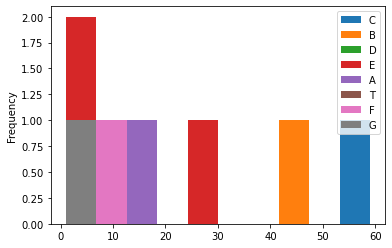

In [76]:
# To know how many types of cabin there, we should visualize the graphic
ticket_class1 = gender_train[gender_train["Pclass"] == 1]["Cabin"].value_counts()
ticket_class2 = gender_train[gender_train["Pclass"] == 2]["Cabin"].value_counts()
ticket_class3 = gender_train[gender_train["Pclass"] == 3]["Cabin"].value_counts()
ticket_class_dataframe = pd.DataFrame([ticket_class1, ticket_class2, ticket_class3])
ticket_class_dataframe.plot.hist()

<AxesSubplot:>

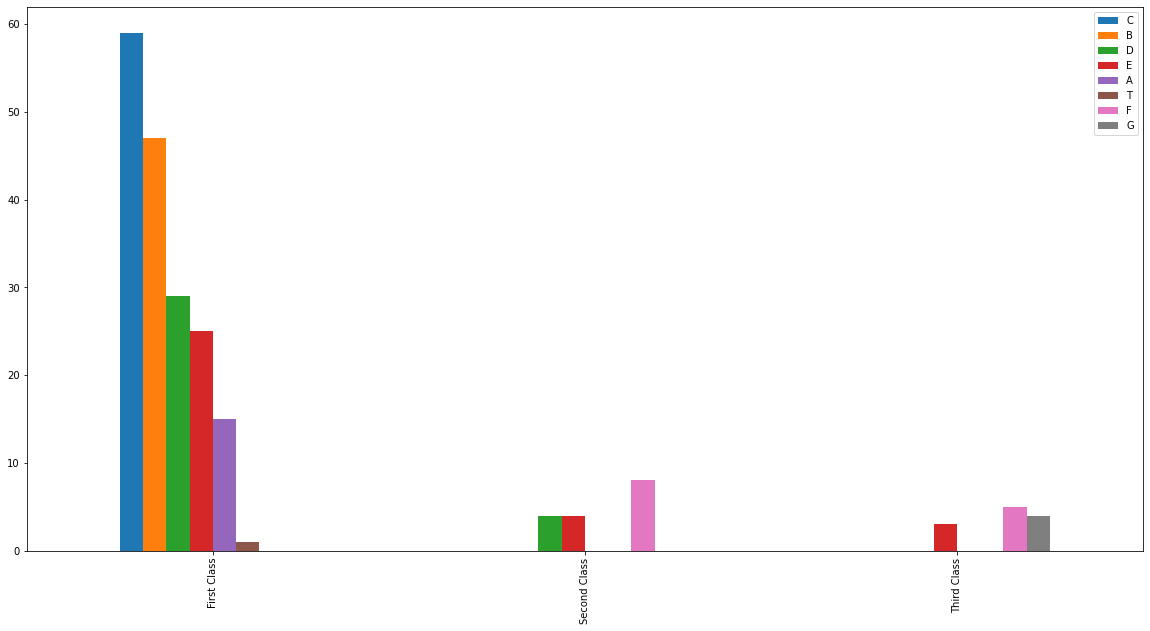

In [77]:
# To know how many types of cabin there, we should visualize the graphic
ticket_class1 = gender_train[gender_train["Pclass"] == 1]["Cabin"].value_counts()
ticket_class2 = gender_train[gender_train["Pclass"] == 2]["Cabin"].value_counts()
ticket_class3 = gender_train[gender_train["Pclass"] == 3]["Cabin"].value_counts()
ticket_class_dataframe = pd.DataFrame([ticket_class1, ticket_class2, ticket_class3])
ticket_class_dataframe.index = ["First Class", "Second Class", "Third Class"]
ticket_class_dataframe.plot(kind = "bar", figsize = (20, 10))

<AxesSubplot:>

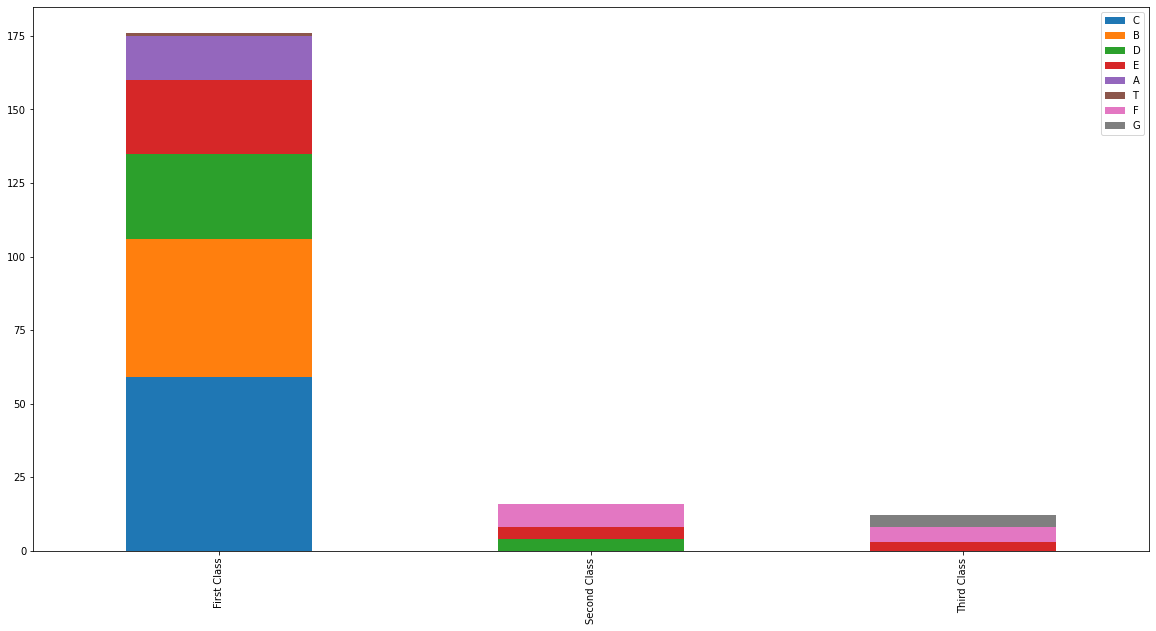

In [78]:
# We use stacked = True to combine each chart to be one chart, so that it'll be seem more organized
ticket_class1 = gender_train[gender_train["Pclass"] == 1]["Cabin"].value_counts()
ticket_class2 = gender_train[gender_train["Pclass"] == 2]["Cabin"].value_counts()
ticket_class3 = gender_train[gender_train["Pclass"] == 3]["Cabin"].value_counts()
ticket_class_dataframe = pd.DataFrame([ticket_class1, ticket_class2, ticket_class3])
ticket_class_dataframe.index = ["First Class", "Second Class", "Third Class"]
ticket_class_dataframe.plot(kind = "bar", figsize = (20, 10), stacked = True)

From the graph above, we can see that there are 8 cabin types: A, B, C, D, E, F, G, T. Then we will map based on the cabin types. We will classify the cabin based on the Pclass. Pclass has small range (1 - 3), so that it'll be easier to classify the cabin based on Pclass. Therefore, we will also give cabin a consistent range / scale that matches Pclass range. As there are 8 cabin, we can give range 3 / 8 = 0.375 ~ 0.4 for the cabin mapping.

In [79]:
for titanic_data in train_test_combine:
    # titanic_data["Cabin"] = titanic_data['Cabin'].map({"A": 0, "B": 0.5, "C": 1, "D": 1.5, "E": 2, "F": 2.5, "G": 3, "T": 3.5})
    titanic_data["Cabin"] = titanic_data['Cabin'].map({"A": 1, "B": 1.4, "C": 1.8, "D": 2.2, "E": 2.6, "F": 3.0, "G": 3.4, "T": 3.8})

In [80]:
# fill missing value of Cabin with Cabin median for each Pclass
gender_train["Cabin"].fillna(gender_train.groupby("Pclass")["Cabin"].transform("median"), inplace = True)
gender_test["Cabin"].fillna(gender_test.groupby("Pclass")["Cabin"].transform("median"), inplace = True)

In [81]:
gender_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare Category
0,1,0,3,0,3.0,1,0,A/5 21171,1.0,3.0,1,1,"(-0.001, 7.91]"
1,2,1,1,1,4.0,1,0,PC 17599,4.0,1.8,2,3,"(31.0, 512.329]"
2,3,1,3,1,3.0,0,0,STON/O2. 3101282,2.0,3.0,1,2,"(7.91, 14.454]"
3,4,1,1,1,3.0,1,0,113803,4.0,1.8,1,3,"(31.0, 512.329]"
4,5,0,3,0,3.0,0,0,373450,2.0,3.0,1,1,"(7.91, 14.454]"


In [82]:
gender_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,3.0,0,0,330911,1.0,3.0,3,1
1,893,3,1,4.0,1,0,363272,1.0,3.0,1,3
2,894,2,0,5.0,0,0,240276,2.0,3.0,3,1
3,895,3,0,3.0,0,0,315154,2.0,3.0,1,1
4,896,3,1,3.0,1,1,3101298,2.0,3.0,1,3


In [83]:
print("\n")

### Family Size

In [84]:
# to engineer family size feature, we should add SibSp(number of passenger's sibling(s)) + Parch(number of passenger(s)) + 1. Therefore, if both SibSP and Parch value are 0, the passenger is perceived to ride Titanic alone.
gender_train["Family Size"] = gender_train["SibSp"] + gender_train["Parch"] + 1
gender_test["Family Size"] = gender_test["SibSp"] + gender_test["Parch"] + 1

In [85]:
for titanic_data in train_test_combine:
    titanic_data["Alone"] = 0
    titanic_data.loc[titanic_data["Family Size"] > 1, "Alone"] = 1
    
gender_train[["Alone", "Survived"]].groupby(["Alone"], as_index = False).mean()

,Alone,Survived
0,0,0.303538
1,1,0.505650


0: Alone | 1: Together with family (sibling(s) / spouse / parent(s))

From the table above and training dataset below, you can see that passenger who travels alone has lower of survival chance than the passenger with family / spouse, which is 30%.

In [86]:
gender_train["Family Size"].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family Size, dtype: int64

In [87]:
gender_test["Family Size"].value_counts()

1     253
2      74
3      57
4      14
5       7
11      4
7       4
6       3
8       2
Name: Family Size, dtype: int64

because we should use consistent range:

In [88]:
for titanic_data in train_test_combine:
    titanic_data["Family Size"] = titanic_data["Family Size"].map({1: 1, 2: 1.4, 3: 1.8, 4: 2.2, 5: 2.6, 6: 3.0, 7: 3.4, 8: 3.8, 11: 4.2})

In [89]:
gender_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare Category,Family Size,Alone
0,1,0,3,0,3.0,1,0,A/5 21171,1.0,3.0,1,1,"(-0.001, 7.91]",1.4,1
1,2,1,1,1,4.0,1,0,PC 17599,4.0,1.8,2,3,"(31.0, 512.329]",1.4,1
2,3,1,3,1,3.0,0,0,STON/O2. 3101282,2.0,3.0,1,2,"(7.91, 14.454]",1.0,0
3,4,1,1,1,3.0,1,0,113803,4.0,1.8,1,3,"(31.0, 512.329]",1.4,1
4,5,0,3,0,3.0,0,0,373450,2.0,3.0,1,1,"(7.91, 14.454]",1.0,0


In [90]:
gender_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family Size,Alone
0,892,3,0,3.0,0,0,330911,1.0,3.0,3,1,1.0,0
1,893,3,1,4.0,1,0,363272,1.0,3.0,1,3,1.4,1
2,894,2,0,5.0,0,0,240276,2.0,3.0,3,1,1.0,0
3,895,3,0,3.0,0,0,315154,2.0,3.0,1,1,1.0,0
4,896,3,1,3.0,1,1,3101298,2.0,3.0,1,3,1.8,1


In [91]:
print("\n")

#### Delete Unneccesary Features

In [92]:
# delete unneeded features
updated_train = gender_train.drop(["SibSp", "Parch", "Ticket", "PassengerId", "Alone", "Fare Category"], axis = 1)
updated_test = gender_test.drop(["SibSp", "Parch", "Ticket", "Alone"], axis = 1)

In [93]:
updated_train.head(50)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family Size
0,0,3,0,3.0,1.0,3.0,1,1,1.4
1,1,1,1,4.0,4.0,1.8,2,3,1.4
2,1,3,1,3.0,2.0,3.0,1,2,1.0
3,1,1,1,3.0,4.0,1.8,1,3,1.4
4,0,3,0,3.0,2.0,3.0,1,1,1.0
5,0,3,0,3.0,2.0,3.0,3,1,1.0
6,0,1,0,4.0,4.0,2.6,1,1,1.0
7,0,3,0,1.0,3.0,3.0,1,4,2.6
8,1,3,1,3.0,2.0,3.0,1,3,1.8
9,1,2,1,2.0,3.0,2.8,2,3,1.4


In [94]:
updated_test.head(50)

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family Size
0,892,3,0,3.0,1.0,3.0,3,1,1.0
1,893,3,1,4.0,1.0,3.0,1,3,1.4
2,894,2,0,5.0,2.0,3.0,3,1,1.0
3,895,3,0,3.0,2.0,3.0,1,1,1.0
4,896,3,1,3.0,2.0,3.0,1,3,1.8
5,897,3,0,2.0,2.0,3.0,1,1,1.0
6,898,3,1,3.0,1.0,3.0,3,2,1.0
7,899,2,0,3.0,3.0,3.0,1,1,1.8
8,900,3,1,2.0,1.0,3.0,2,3,1.0
9,901,3,0,2.0,3.0,3.0,1,1,1.8


In [95]:
updated_train.shape

(891, 9)

In [96]:
updated_test.shape

(418, 9)

In [97]:
print("\n\n")

### Data Classification

In [98]:
x_train = updated_train.drop("Survived", axis = 1)
y_train = updated_train["Survived"]
x_test = updated_test.drop("PassengerId", axis = 1)

In [99]:
x_train.shape

(891, 8)

In [100]:
y_train.shape

(891,)

In [101]:
x_test.shape

(418, 8)

In [102]:
print("\n")

So, we'll test the accuracy score with these methods:
a. Logistic Regression
b. K-Nearest Neighbors
c. Naive Bayes
d. Neural Network
e. Decision Tree

# Logistic Regression

In [103]:
# previously, it was error because I haven't categorized Fare and that's why it's too big for dfloat64 size
# because values in Fare column is too big, even reaches 512. Also, I forgot to categorize the name in the training dataset..

# actually, logistic model is still poor as there are less significant variables.
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)
y_predict = logistic_regression.predict(x_test)

round(logistic_regression.score(x_train, y_train) * 100, 2)

81.48

In [104]:
# x_train.isnull().sum()
# last time, name had 11 NANs

In [105]:
print(classification_report(y_train, logistic_regression.predict(x_train)))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       549
           1       0.78      0.72      0.75       342

    accuracy                           0.81       891
   macro avg       0.81      0.80      0.80       891
weighted avg       0.81      0.81      0.81       891



In [106]:
print("\n\n")

# K-Nearest Neighbors

In [107]:
# KNN = KNeighborsClassifier(n = 10)
# KNN.fit(x_train, y_train)
# y_predict = logistic_regression.predict(x_test)

# round(logistic_regression.score(x_train, y_train) * 100, 2)

TypeError: __init__() got an unexpected keyword argument 'n'

In [108]:
KNN = KNeighborsClassifier(n_neighbors = 10)
KNN.fit(x_train, y_train)
y_predict = KNN.predict(x_test)

round(KNN.score(x_train, y_train) * 100, 2)

83.5

In [109]:
print(classification_report(y_train, KNN.predict(x_train)))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       549
           1       0.83      0.72      0.77       342

    accuracy                           0.84       891
   macro avg       0.83      0.81      0.82       891
weighted avg       0.83      0.84      0.83       891



In [110]:
print("\n\n")

# Naive Bayes

In [111]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)
y_predict = naive_bayes.predict(x_test)

round(naive_bayes.score(x_train, y_train) * 100, 2)

71.72

In [112]:
print(classification_report(y_train, naive_bayes.predict(x_train)))

              precision    recall  f1-score   support

           0       0.69      0.97      0.81       549
           1       0.87      0.31      0.46       342

    accuracy                           0.72       891
   macro avg       0.78      0.64      0.63       891
weighted avg       0.76      0.72      0.67       891



In [113]:
print("\n\n")

# Neural Network

In [114]:
# neural_network = MLPClassifier(solver = "adam", hidden_layer_sizes = (2500, ), random_state = 1, activation = "relu", max_iter = 50)
# neural_network.fit(x_train, y_train)
# y_predict = neural_network.predict(x_test)

# round(neural_network.score(x_train, y_train) * 100, 2)

# No Error, but there's a warning

C:\Users\Belinda Gan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


84.06

In [115]:
neural_network = MLPClassifier(solver = "sgd", hidden_layer_sizes = (2500, ), random_state = 1, activation = "relu", max_iter = 500)
neural_network.fit(x_train, y_train)
y_predict = neural_network.predict(x_test)

round(neural_network.score(x_train, y_train) * 100, 2)

82.04

In [116]:
confusion_matrix(y_train, neural_network.predict(x_train))

array([[485,  64],
       [ 96, 246]], dtype=int64)

In [117]:
print(classification_report(y_train, neural_network.predict(x_train)))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       549
           1       0.79      0.72      0.75       342

    accuracy                           0.82       891
   macro avg       0.81      0.80      0.81       891
weighted avg       0.82      0.82      0.82       891



In [118]:
print("\n\n")

# Decision Tree

In [119]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_predict = decision_tree.predict(x_test)

round(decision_tree.score(x_train, y_train) * 100, 2)

90.35

In [120]:
print(classification_report(y_train, decision_tree.predict(x_train)))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       549
           1       0.93      0.81      0.87       342

    accuracy                           0.90       891
   macro avg       0.91      0.89      0.90       891
weighted avg       0.91      0.90      0.90       891



In [121]:
print("\n\n")

Dari masing-masing metode (Decision Tree, KNN, dst), pilih akurasi yang terbaik alias akurasi yang paling besar

In [122]:
# ACCURACY SCORE from EACH METHOD
# 1. Decision Tree - 90.35
# 2. KNN - 83.5
# 3. Neural Network - 82.04
# 4. Logistic Regression - 81.48
# 5. Naive Bayes - 71.72

# Jadi, model dengan metode yang memiliki akurasi terbaik adalah Decision Tree dengan akurasi sebesar 90.35

In [123]:
print("\n\n")

### Submission

In [124]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_predict = decision_tree.predict(x_test)

In [125]:
submission = pd.DataFrame({"PassengerId": gender_test["PassengerId"], "Survived": y_predict})
submission.to_csv("gender_submission2.csv", index = False)

In [128]:
check_submission = pd.read_csv("gender_submission2.csv")
check_submission.head(50)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [127]:
print("\n\n")

#### Resources

1. https://youtu.be/lZ2nib47eA8

2. https://www.kaggle.com/anaskad/step-by-step-solving-titanic-problem

3. https://www.kaggle.com/startupsci/titanic-data-science-solutions

4. https://youtu.be/3eTSVGY_fIE

5. https://youtu.be/I3FBJdiExcg

6. https://youtu.be/COUWKVf6zKY

7. https://youtu.be/GXWBzcAzjoQ

8. https://github.com/minsuk-heo/kaggle-titanic/blob/master/titanic-solution.ipynb

9. https://www.kaggle.com/chapagain/titanic-solution-a-beginner-s-guide

10. https://youtu.be/wQ8BIBpya2k

11. https://www.kaggle.com/jamesleslie/titanic-neural-network-for-beginners

12. https://www.pluralsight.com/guides/machine-learning-neural-networks-scikit-learn

13. https://www.kaggle.com/statinstilettos/neural-network-approach

14. https://stackoverflow.com/questions/57210169/convergencewarning-stochastic-optimizer-maximum-iterations-10-reached-and-th

15. 16 December 2020 CLC Notes Supervised Learning (Classification)

16. https://stackoverflow.com/questions/22149584/what-does-axis-in-pandas-mean